In [1]:
import pandas as pd

from univariate import univariate

Obj=univariate()

#!pip install yfinance
from nsepy import get_history
import datetime as dt
import yfinance as yf
    
# Define the start and end dates
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
symbol='AXISBANK.NS'
    
stk_data=yf.download(symbol, start=start, end=end)
stk_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024,741.917419,6660243
2021-06-02,744.799988,745.299988,734.200012,737.000000,733.802795,9973043
2021-06-03,743.000000,752.250000,739.000000,750.650024,747.393555,8170508
2021-06-04,751.000000,759.900024,740.099976,742.049988,738.830811,10336011
2021-06-07,743.099976,753.950012,741.500000,751.099976,747.841553,6986728
...,...,...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000,667.591248,3969894
2021-12-30,668.000000,673.099976,664.500000,668.849976,665.948364,5119705
2021-12-31,672.950012,686.500000,671.200012,678.549988,675.606262,5586980


In [2]:
stk_data=stk_data[['Open','High','Low','Close']]
stk_data

,Open,High,Low,Close
Date,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024
2021-06-02,744.799988,745.299988,734.200012,737.000000
2021-06-03,743.000000,752.250000,739.000000,750.650024
2021-06-04,751.000000,759.900024,740.099976,742.049988
2021-06-07,743.099976,753.950012,741.500000,751.099976
...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000
2021-12-30,668.000000,673.099976,664.500000,668.849976
2021-12-31,672.950012,686.500000,671.200012,678.549988


In [3]:
stk_data=stk_data[['Open','High','Low','Close']]
stk_data

,Open,High,Low,Close
Date,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024
2021-06-02,744.799988,745.299988,734.200012,737.000000
2021-06-03,743.000000,752.250000,739.000000,750.650024
2021-06-04,751.000000,759.900024,740.099976,742.049988
2021-06-07,743.099976,753.950012,741.500000,751.099976
...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000
2021-12-30,668.000000,673.099976,664.500000,668.849976
2021-12-31,672.950012,686.500000,671.200012,678.549988


In [4]:
column='Close'

from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data1=ms.fit_transform(stk_data[[column]])
print('len:',data1.shape)


len: (150, 1)


In [5]:
len(data1)

150

In [6]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size: ]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size: ]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

120
X_train length: (120, 1)
X_test length: (30, 1)
y_train length: (120, 1)
y_test length: (30, 1)


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=n
RMSE-Testset: 0.17952057823222592
maPe-Testset: 4772432318766.497
************


C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=t
RMSE-Testset: 0.7291763982208165
maPe-Testset: 80717371512228.66
************


C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=c
RMSE-Testset: 0.3669409571184322
maPe-Testset: 53491056681567.48
************
Trend=ct
RMSE-Testset: 0.4035664445567253
maPe-Testset: 56685884847842.78
************


C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
len(y_pred)

30

In [10]:
#i=1
td="n"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=n
RMSE-Testset: 0.22765280120156645
maPe-Testset: 10773206926611.607
************


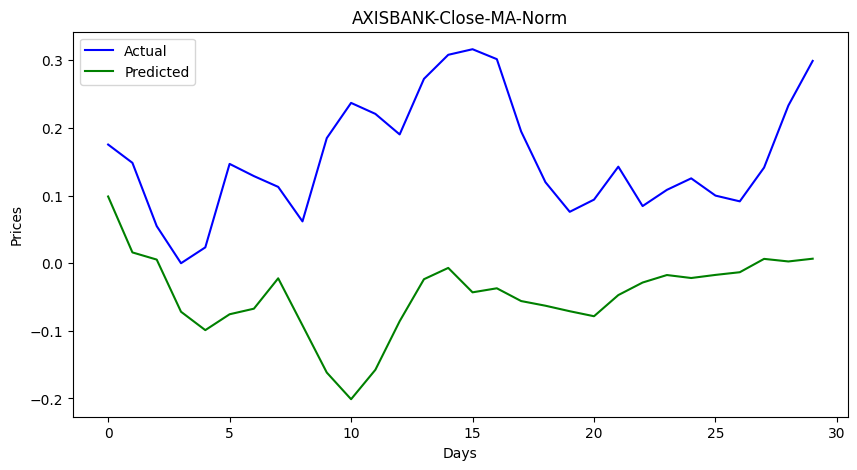

In [11]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","AXISBANK-Close-MA-Norm","Days","Prices")

In [12]:
len(data1)

150

In [13]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [14]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

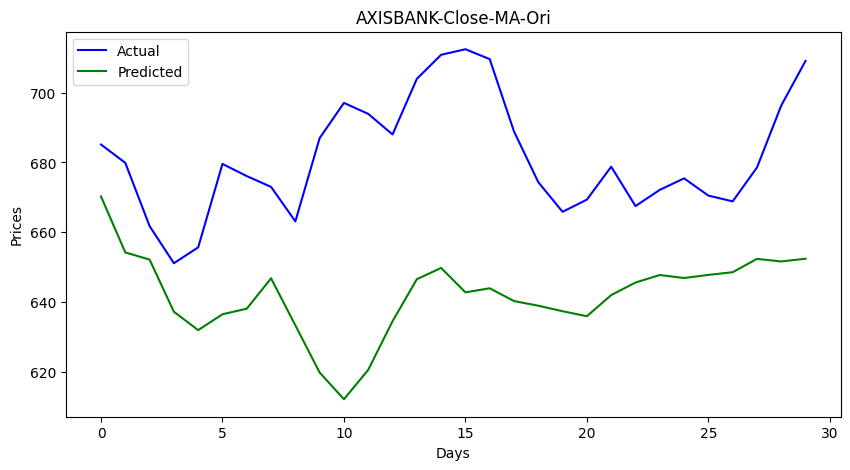

In [15]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","AXISBANK-Close-MA-Ori","Days","Prices")

In [16]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 44.164643433103905
maPe-Testset: 0.0575401178967421


In [17]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [18]:
forecast

array([0., 0., 0., 0.])

In [19]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])
forecast_stock_price_test_oriF

,Closefore
0,651.099976
1,651.099976
2,651.099976
3,651.099976


In [20]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

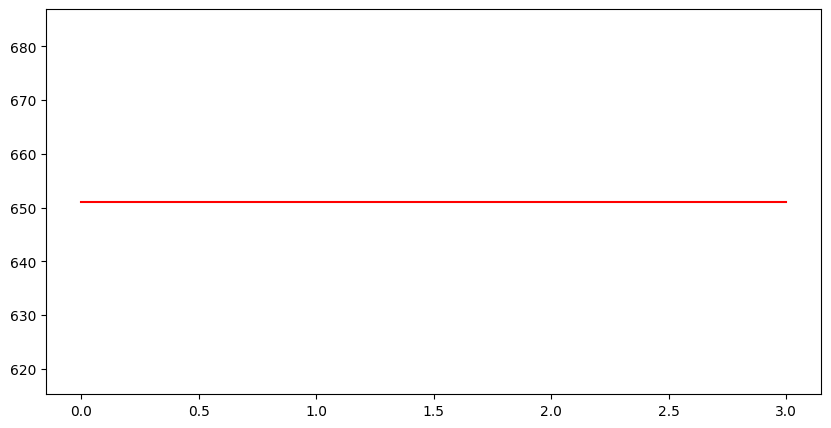

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")